<a href="https://colab.research.google.com/github/ALRIER/Multivatriate-R-Factorial_analysis/blob/main/First_model_PCA_EFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install semopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for semopy: filename=semopy-2.3.9-py3-none-any.whl size=1657804 sha256=33cf7f7eea7337a9b79c08f7e91bdf16ba975fa20cc81d0aa9e2e3a42a06b522
  Stored in directory: /root/.cache/pip/wheels/aa/d5/83/afbfa4fe06d08c0ec7849e93aa71843aa514684b3f22e3a694
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=21919a542b0589a8b97cf560558cc6fcf4d791ca980eb9db62b09a0b49e3d30c
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built semopy sklearn


In [ ]:
!pip install rpy2==3.5.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp38-cp38-linux_x86_64.whl size=318386 sha256=b98515afc5b815fcf630829f3a0dc8dd6a093105e1e3b95d4ec9dda35ee9a447
  Stored in directory: /root/.cache/pip/wheels/6b/40/7d/f63e87fd83e8b99ee837c8e3489081c4b3489134bc520235ed
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
# activate R magic
%load_ext rpy2.ipython
     

## Preparing the enviroment

The present database is the result of a survey. in total 821 participants all over the Colombian territory 

The topic is "perceived value that the client identifies in some dark tourism packages." 

Based on that, the objective of the present process was to research the theoric structure that fits better with the database and the client's point of view.  

In this order of ideas, the document will cover different stages. First of all, the atoms will proceed with a PCA/Exploratory factor analysis. 

It is important to mention that, the author wants to confirm between 3 different theoric structures, which is the one that fits better with the data. This is based on Cho & Yang. (2018) document.  Based on the abovementioned, structural equation modeling (SEM) is conducted in the second aspect. 

Once this process was conducted, an invariance analysis in order to understand if there were any differences between sex groups in the perception of the value. 

In this order of ideas, i will proceed to upload the database.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')   

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data = pd.read_excel('/content/drive/MyDrive/AAA DOCTORADO/PROYECTO DOCTORAL/Respuestas encuesta final (1).xlsx')
data.head(3)

,iys1,iys2,iys3,iys4,iys5,iys6,iys7,iys8,iys9,iys10,...,cond_usual10,cond_usual11,cond_usual12,determinantes1,determinantes2,determinantes3,determinantes4,determinantes5,determinantes6,determinantes7
0,3,3,7,1,5,5,3,3,5,5,...,3,4,4,5,2,3,3,5,5,3
1,3,3,7,1,5,5,3,3,5,5,...,3,4,4,5,2,3,3,5,5,3
2,3,3,7,1,5,5,3,3,5,5,...,3,4,4,5,2,3,3,5,5,3


##CORRELATIONS

Once I have the database with all the information I will take a look at a ***correlation*** matrix to understand the data in deep.

(as ‘lib’ is unspecified)







	‘/tmp/RtmpF3vnwX/downloaded_packages’



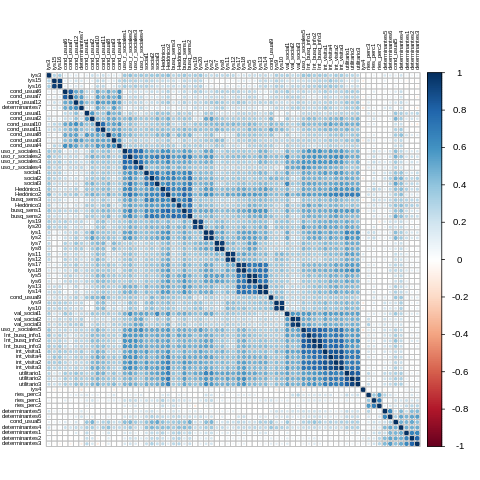

In [14]:
%%R -i data
mcorre=cor(data)
install.packages("corrplot");
library("corrplot");
corrplot(cor(data), order="hclust", tl.col='black', tl.cex=0.5)

##KMO TEST 

Now, we apply bartlett tests, covariance, kmo, etc. It is important to take into account that for kmo the variables must be above 0.70 to be an excellent level of factor analysis.


In [16]:
%%R
bartlett.test(data)
install.packages("psych")
library("psych")
KMO(data)

(as ‘lib’ is unspecified)














	‘/tmp/RtmpF3vnwX/downloaded_packages’



Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = data)
Overall MSA =  0.9
MSA for each item = 
           iys1            iys2            iys3            iys4            iys5 
           0.89            0.89            0.93            0.41            0.89 
           iys6            iys7            iys8            iys9           iys10 
           0.88            0.86            0.86            0.86            0.86 
          iys11           iys12           iys13           iys14           iys15 
           0.81            0.80            0.90            0.90            0.69 
          iys16           iys17           iys18           iys19           iys20 
           0.71            0.85            0.86            0.85            0.85 
    utilitario1     utilitario2     utilitario3      ries_perc1      ries_perc2 
           0.96            0.93            0.91            0.61            0.48 
     ries_perc3       Hedónico1       Hedónico2       Hedónico3      busq_sens1 
           0.6


##EIGEN COVARIANCE MATIX

A second test to identify grouping of components by eigen covariance matrix. 
Thus, we identify the weight of each group of variables to explain a factor.

In [17]:
%%R
install.packages("corrr")
library("corrr")
eigen(mcorre)

(as ‘lib’ is unspecified)



























































	‘/tmp/RtmpF3vnwX/downloaded_packages’



eigen() decomposition
$values
 [1] 25.60589307  4.59064203  3.61827167  3.22281726  2.56936305  2.27040527
 [7]  1.92770517  1.69306548  1.50627124  1.47545284  1.40629324  1.19933384
[13]  1.12274128  1.04035352  0.95904223  0.90323491  0.82846073  0.81653691
[19]  0.75254460  0.71779446  0.66653194  0.65537642  0.57367123  0.53952462
[25]  0.53170131  0.50941407  0.46266705  0.44641439  0.41957122  0.39163732
[31]  0.36968255  0.35715430  0.32730783  0.30879734  0.30028267  0.29309250
[37]  0.27930234  0.26008164  0.23699794  0.23297819  0.21944145  0.19173358
[43]  0.18540046  0.17093118  0.16852458  0.15445912  0.13639234  0.12528961
[49]  0.12409247  0.11699234  0.10952902  0.10846793  0.09446061  0.08694823
[55]  0.07980403  0.07602526  0.06771515  0.05717011  0.04942237  0.04405171
[61]  0.04152989  0.03778230  0.03429887  0.02915175  0.02747283  0.02432888
[67]  0.02172541  0.01711921  0.01132967

$vectors
              [,1]         [,2]          [,3]          [,4]         [,5]

#PCA PRINCIPAL COMPONENTS ANALYSIS.

I can identify a PCA model to allow the team and their algorithm to identify by unsupervised learning the best model for clustering variables.

In [18]:
%%R
acp = prcomp(data, center = T, scale. = T)
print(acp)

Standard deviations (1, .., p=69):
 [1] 5.0602266 2.1425784 1.9021755 1.7952207 1.6029233 1.5067864 1.3884182
 [8] 1.3011785 1.2273024 1.2146822 1.1858724 1.0951410 1.0595949 1.0199772
[15] 0.9793070 0.9503867 0.9101982 0.9036243 0.8674933 0.8472275 0.8164141
[22] 0.8095532 0.7574109 0.7345234 0.7291785 0.7137325 0.6801963 0.6681425
[29] 0.6477432 0.6258093 0.6080153 0.5976239 0.5721082 0.5556954 0.5479805
[36] 0.5413802 0.5284906 0.5099820 0.4868243 0.4826781 0.4684458 0.4378739
[43] 0.4305815 0.4134382 0.4105175 0.3930129 0.3693133 0.3539627 0.3522676
[50] 0.3420414 0.3309517 0.3293447 0.3073444 0.2948699 0.2824961 0.2757268
[57] 0.2602213 0.2391027 0.2223114 0.2098850 0.2037888 0.1943767 0.1851995
[64] 0.1707388 0.1657493 0.1559772 0.1473954 0.1308404 0.1064409

Rotation (n x k) = (69 x 69):
                         PC1          PC2           PC3           PC4
iys1             0.139906646 -0.025271992  0.0518310222 -0.0890385236
iys2             0.140545673 -0.034763117  0.079912484

# EFA EXPLORATORY FACTOR ANALYSIS 
I proceed to determine the number of factors, but taking into account that in the future I will have to set the number between 4 or 5, I will get an idea.

In [19]:
%%R
AnalisisF <- factanal(data, factors = 4, rotation = "varimax", scores= "Bartlett")
AnalisisF

Here we can see that the factor loadings are not very good, besides the cumulative variance is too low for the 4 proposed factors.

I am going to try the confirmatory analysis simply to see what the result is based on the theoretically proposed model.

##Confirmatory factor analysis

Now I will proceed to create my model as I have identified it in my theoretical model to see if it fits or not with the theory.

In [20]:
%%R
modelo_confir0 = 'vp =~ utilitario1 + utilitario2	+ utilitario3	+ ries_perc1	+ ries_perc2	+ ries_perc3	+ Hedónico1	+ Hedónico2	+ Hedónico3	+ busq_sens1	+ busq_sens2	+ busq_sens3	+ social1	+ social2	+ social3	+ val_social1	+ val_social2	+ val_social3	+ uso_r_sociales1	+ uso_r_sociales2	+ uso_r_sociales3	+ uso_r_sociales4	+ uso_r_sociales5	+ Int_busq_info1	+ Int_busq_info2	+ Int_busq_info3	+ int_visita1	+ int_visita2	+ int_visita3	+ int_visita4 + cond_usual1 + cond_usual2 + cond_usual3 + cond_usual4 + cond_usual5 + cond_usual6 + cond_usual7 + cond_usual8 + cond_usual9 + cond_usual10 + cond_usual11 + cond_usual12 + determinantes1 + determinantes2 + determinantes3 + determinantes4 + determinantes5 + determinantes6 + determinantes7'

Once I have my model, now I will proceed to create the model with the CFA function called from the Lavaan package and print a summary. 

This model responds to the first approximation I did to statistical modeling for this set of data. However, as I saw in the PCA and in the exploratory FA all the variables are not fitting god.


In [21]:
%%R
install.packages("lavaan")
library("lavaan")
modelo0 <- cfa(modelo_confir0, data = data)
summary(modelo0, fit.measures=TRUE, rsq=TRUE)

(as ‘lib’ is unspecified)
























	‘/tmp/RtmpF3vnwX/downloaded_packages’

lavaan is FREE software! Please report any bugs.

Attaching package: ‘lavaan’



    cor2cov




lavaan 0.6.14 ended normally after 39 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        98

  Number of observations                           821

Model Test User Model:
                                                       
  Test statistic                              23782.818
  Degrees of freedom                               1127
  P-value (Chi-square)                            0.000

Model Test Baseline Model:

  Test statistic                             42622.022
  Degrees of freedom                              1176
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.453
  Tucker-Lewis Index (TLI)                       0.430

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             -71112.742
  Loglikelihood unrestricted model (H1)     

Now, taking a look at the parameters of the model, it's possible to see some estimations extremely high; over 100%, which is not a good thing for a model, not in correlation or in covariances either. 

In [23]:
%%R
parameterestimates(modelo0, standardized = TRUE)

               lhs op             rhs   est    se      z pvalue ci.lower
1               vp =~     utilitario1 1.000 0.000     NA     NA    1.000
2               vp =~     utilitario2 1.028 0.043 23.854  0.000    0.944
3               vp =~     utilitario3 0.974 0.041 23.649  0.000    0.893
4               vp =~      ries_perc1 0.275 0.042  6.515  0.000    0.192
5               vp =~      ries_perc2 0.138 0.044  3.146  0.002    0.052
6               vp =~      ries_perc3 0.253 0.043  5.830  0.000    0.168
7               vp =~       Hedónico1 0.954 0.041 23.013  0.000    0.872
8               vp =~       Hedónico2 1.093 0.042 25.972  0.000    1.010
9               vp =~       Hedónico3 0.742 0.039 19.262  0.000    0.667
10              vp =~      busq_sens1 0.948 0.041 22.893  0.000    0.867
11              vp =~      busq_sens2 0.851 0.040 21.312  0.000    0.773
12              vp =~      busq_sens3 0.714 0.038 18.645  0.000    0.639
13              vp =~         social1 0.868 0.041 2

Plotting the model is possible to see the horrible results I have gotten with this model; I definitely, gotta try another model. Let's jump into the next model proposition. 